# Part 1: Clean Airbnb Data

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

### View data and drop columns

In [2]:
raw = pd.read_csv('listings.csv')
raw.head(1)

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (61,62,94,95) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2060,https://www.airbnb.com/rooms/2060,20200408162728,2020-04-09,Modern NYC,NaN,"Lovely, spacious, sunny 1 BR apartment in 6th ...","Lovely, spacious, sunny 1 BR apartment in 6th ...",none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/3755/3f9d3...,NaN,2259,https://www.airbnb.com/users/show/2259,Jenny,2008-08-18,US,NaN,a few days or more,22%,50%,f,https://a0.muscache.com/im/users/2259/profile_...,https://a0.muscache.com/im/users/2259/profile_...,Washington Heights,0.0,0.0,['reviews'],t,f,"New York, NY, United States",Washington Heights,Washington Heights,Manhattan,New York,NY,10040,New York,"New York, NY",US,United States,40.85722,-73.9379,t,Other,Private room,2,NaN,1.0,2.0,Real Bed,"{Internet,Wifi}",NaN,$100.00,NaN,NaN,NaN,NaN,1,$0.00,1,730,1,1,730,730,1.0,730.0,2 months ago,t,30,60,90,365,2020-04-09,1,0,2008-09-22,2008-09-22,80.0,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,flexible,f,f,1,0,1,0,0.01


First we will drop any columns that seem unnecessary

In [3]:
todrop = []
for name in raw.columns:
    if 'calculated' in name or 'url' in name or 'minimum' in name or 'maximum' in name:
        todrop.append(name)

In [4]:
raw.drop(todrop, axis=1, inplace=True)

In [5]:
todrop = ['host_location','scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered',
         'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'host_name',
         'host_about', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count',
         'host_verifications', 'host_has_profile_pic', 'street', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed',
         'city', 'state', 'market', 'smart_location', 'country_code', 'country', 'is_location_exact', 'square_feet',
         'weekly_price', 'monthly_price', 'security_deposit', 'calendar_updated', 'calendar_last_scraped','number_of_reviews_ltm',
         'first_review', 'last_review', 'requires_license', 'license', 'jurisdiction_names', 'host_id']
data = raw.drop(todrop, axis=1)
data.head()

,id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,neighbourhood,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,cleaning_fee,guests_included,extra_people,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,2060,2008-08-18,a few days or more,22%,50%,f,f,Washington Heights,10040,40.85722,-73.93790,Other,Private room,2,NaN,1.0,2.0,Real Bed,"{Internet,Wifi}",$100.00,NaN,1,$0.00,t,30,60,90,365,1,80.0,NaN,NaN,NaN,NaN,NaN,NaN,f,f,flexible,f,f,0.01
1,2595,2008-09-09,within a few hours,93%,36%,f,t,Manhattan,10018,40.75362,-73.98377,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",$225.00,$95.00,1,$0.00,t,30,60,90,365,48,94.0,9.0,9.0,10.0,10.0,10.0,9.0,f,f,strict_14_with_grace_period,t,t,0.38
2,3831,2008-12-07,within an hour,89%,95%,f,t,Clinton Hill,11238,40.68514,-73.95976,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$89.00,NaN,1,$0.00,t,30,55,71,233,315,89.0,9.0,9.0,10.0,9.0,9.0,8.0,f,f,moderate,f,f,4.68
3,5099,2009-02-02,NaN,NaN,75%,f,f,Midtown East,10016,40.74767,-73.97500,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$200.00,$125.00,2,$100.00,t,0,0,0,0,78,90.0,10.0,9.0,10.0,10.0,10.0,9.0,f,f,moderate,t,t,0.58
4,5121,2009-02-03,NaN,NaN,67%,f,f,Brooklyn,11216,40.68688,-73.95596,Apartment,Private room,2,NaN,1.0,1.0,Futon,"{Wifi,""Air conditioning"",Kitchen,""Pets live on...",$60.00,$0.00,1,$30.00,t,30,60,90,365,50,90.0,8.0,8.0,10.0,10.0,9.0,9.0,f,f,strict_14_with_grace_period,f,f,0.38


Notice that 'is_business_travel_ready' consists of the same value for all samples so we can drop it

In [6]:
data['is_business_travel_ready'].unique()

array(['f'], dtype=object)

In [7]:
data.drop('is_business_travel_ready', axis=1, inplace=True)

### Feature engineering and dtype conversion

Next, we can find the number of days a host has been on Airbnb and replace the host_since field

In [8]:
data['host_since'] = pd.to_datetime(data['host_since'])
data['host_for_x_days'] = (dt.datetime.now() - data['host_since']).dt.days
data.drop('host_since', axis=1, inplace=True)
data.head()

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,neighbourhood,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,cleaning_fee,guests_included,extra_people,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,host_for_x_days
0,2060,a few days or more,22%,50%,f,f,Washington Heights,10040,40.85722,-73.93790,Other,Private room,2,NaN,1.0,2.0,Real Bed,"{Internet,Wifi}",$100.00,NaN,1,$0.00,t,30,60,90,365,1,80.0,NaN,NaN,NaN,NaN,NaN,NaN,f,flexible,f,f,0.01,4284.0
1,2595,within a few hours,93%,36%,f,t,Manhattan,10018,40.75362,-73.98377,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",$225.00,$95.00,1,$0.00,t,30,60,90,365,48,94.0,9.0,9.0,10.0,10.0,10.0,9.0,f,strict_14_with_grace_period,t,t,0.38,4262.0
2,3831,within an hour,89%,95%,f,t,Clinton Hill,11238,40.68514,-73.95976,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$89.00,NaN,1,$0.00,t,30,55,71,233,315,89.0,9.0,9.0,10.0,9.0,9.0,8.0,f,moderate,f,f,4.68,4173.0
3,5099,NaN,NaN,75%,f,f,Midtown East,10016,40.74767,-73.97500,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$200.00,$125.00,2,$100.00,t,0,0,0,0,78,90.0,10.0,9.0,10.0,10.0,10.0,9.0,f,moderate,t,t,0.58,4116.0
4,5121,NaN,NaN,67%,f,f,Brooklyn,11216,40.68688,-73.95596,Apartment,Private room,2,NaN,1.0,1.0,Futon,"{Wifi,""Air conditioning"",Kitchen,""Pets live on...",$60.00,$0.00,1,$30.00,t,30,60,90,365,50,90.0,8.0,8.0,10.0,10.0,9.0,9.0,f,strict_14_with_grace_period,f,f,0.38,4115.0


Next, we should convert any 'false' values to 0 and 'true' to 1

In [9]:
mapping = {'f': 0, 't': 1}
data= data.replace({'host_is_superhost': mapping, 'host_identity_verified': mapping, 'instant_bookable': mapping, 'is_business_travel_ready': mapping, 'require_guest_profile_picture': mapping, 'require_guest_phone_verification': mapping, 'has_availability': mapping})
data.head(1)

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,neighbourhood,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,cleaning_fee,guests_included,extra_people,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,host_for_x_days
0,2060,a few days or more,22%,50%,0.0,0.0,Washington Heights,10040,40.85722,-73.9379,Other,Private room,2,NaN,1.0,2.0,Real Bed,"{Internet,Wifi}",$100.00,NaN,1,$0.00,1,30,60,90,365,1,80.0,NaN,NaN,NaN,NaN,NaN,NaN,0,flexible,0,0,0.01,4284.0


We should check the data types and make any adjustments

In [10]:
data.dtypes

id                                    int64
host_response_time                   object
host_response_rate                   object
host_acceptance_rate                 object
host_is_superhost                   float64
host_identity_verified              float64
neighbourhood                        object
zipcode                              object
latitude                            float64
longitude                           float64
property_type                        object
room_type                            object
accommodates                          int64
bathrooms                           float64
bedrooms                            float64
beds                                float64
bed_type                             object
amenities                            object
price                                object
cleaning_fee                         object
guests_included                       int64
extra_people                         object
has_availability                

Note that we need to convert 'host_acceptance_rate', 'price', 'cleaning_fee', and 'extra_people' from objects to ints

In [11]:
data['host_response_rate'] = data['host_response_rate'].str.strip('%').astype('float')/100.0
data['host_acceptance_rate'] = data['host_acceptance_rate'].str.strip('%').astype('float') / 100.0

#get rid of any commas as they will cause errors
data['cleaning_fee'] = data['cleaning_fee'].str.replace(',', '')
data['cleaning_fee'] = data['cleaning_fee'].str.strip('$').astype('float')

data['extra_people'] = data['extra_people'].str.strip('$').astype('float')

data['price'] = data['price'].str.replace(',', '')
data['price'] = data['price'].str.strip('$').astype('float')

Next, find the price per person.

In [12]:
data['price_per_person'] = data['price']/data['guests_included']
data.drop('price', axis=1, inplace=True)
data.head()

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,neighbourhood,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,cleaning_fee,guests_included,extra_people,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,host_for_x_days,price_per_person
0,2060,a few days or more,0.22,0.50,0.0,0.0,Washington Heights,10040,40.85722,-73.93790,Other,Private room,2,NaN,1.0,2.0,Real Bed,"{Internet,Wifi}",NaN,1,0.0,1,30,60,90,365,1,80.0,NaN,NaN,NaN,NaN,NaN,NaN,0,flexible,0,0,0.01,4284.0,100.0
1,2595,within a few hours,0.93,0.36,0.0,1.0,Manhattan,10018,40.75362,-73.98377,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",95.0,1,0.0,1,30,60,90,365,48,94.0,9.0,9.0,10.0,10.0,10.0,9.0,0,strict_14_with_grace_period,1,1,0.38,4262.0,225.0
2,3831,within an hour,0.89,0.95,0.0,1.0,Clinton Hill,11238,40.68514,-73.95976,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,1,0.0,1,30,55,71,233,315,89.0,9.0,9.0,10.0,9.0,9.0,8.0,0,moderate,0,0,4.68,4173.0,89.0
3,5099,NaN,NaN,0.75,0.0,0.0,Midtown East,10016,40.74767,-73.97500,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",125.0,2,100.0,1,0,0,0,0,78,90.0,10.0,9.0,10.0,10.0,10.0,9.0,0,moderate,1,1,0.58,4116.0,100.0
4,5121,NaN,NaN,0.67,0.0,0.0,Brooklyn,11216,40.68688,-73.95596,Apartment,Private room,2,NaN,1.0,1.0,Futon,"{Wifi,""Air conditioning"",Kitchen,""Pets live on...",0.0,1,30.0,1,30,60,90,365,50,90.0,8.0,8.0,10.0,10.0,9.0,9.0,0,strict_14_with_grace_period,0,0,0.38,4115.0,60.0


### Converting amenities into its own dataframe

Next, we can make a one-hot encoded dataframe of amenities for each listing. Here, 1 means the listing has it and 0 means it doesn't

In [13]:
#make list of all possible amenities
all_am = []
for index, row in data.iterrows():
    am = row['amenities']
    am = am.replace('{', '')
    am = am.replace('}', '')
    list_am = am.split(',')
    
    for item in list_am:
        item = item.replace('"', '')
        if 'translation' not in item:
            if item not in all_am:
                all_am.append(item)

In [14]:
#make temporary dataframe using list of all possible amenities, we can merge it later
temp = np.zeros((data.shape[0], len(all_am)))
amenities = pd.DataFrame(temp, columns=all_am)
amenities.head()

,Internet,Wifi,TV,Air conditioning,Kitchen,Paid parking off premises,Free street parking,Heating,Family/kid friendly,Smoke detector,Carbon monoxide detector,Fire extinguisher,Essentials,Lock on bedroom door,Hair dryer,Iron,Laptop friendly workspace,Self check-in,Keypad,Private living room,Bathtub,Hot water,Bed linens,Extra pillows and blankets,Ethernet connection,Coffee maker,Refrigerator,Dishes and silverware,Cooking basics,Oven,Stove,Luggage dropoff allowed,Long term stays allowed,Cleaning before checkout,Cable TV,Pets allowed,Shampoo,24-hour check-in,Hangers,Lockbox,High chair,Stair gates,Children’s books and toys,Pack ’n Play/travel crib,Microwave,Buzzer/wireless intercom,First aid kit,Host greets you,Pets live on this property,Cat(s),Doorman,Breakfast,Dog(s),Elevator,Dishwasher,Waterfront,Suitable for events,Washer,Dryer,Safety card,Patio or balcony,Garden or backyard,Beach essentials,Private entrance,Other,Building staff,Window guards,No stairs or steps to enter,Shower gel,Trash can,Crib,BBQ grill,Wheelchair accessible,Room-darkening shades,Pocket wifi,Single level home,Babysitter recommendations,Baking sheet,Pool,Washer/Dryer,Paid parking on premises,Hot tub,Children’s dinnerware,Free parking on premises,Other pet(s),Smart lock,Gym,Outlet covers,Baby bath,Changing table,Table corner guards,Firm mattress,Smoking allowed,Indoor fireplace,Game console,Fireplace guards,EV charger,Wide hallways,Wide entrance for guests,Well-lit path to entrance,Ski-in/Ski-out,Private bathroom,Baby monitor,Barbecue utensils,Flat path to guest entrance,Beachfront,Extra space around bed,Accessible-height bed,Accessible-height toilet,Fixed grab bars for shower,Hot water kettle,,Lake access,Handheld shower head,Bread maker,Ground floor access,Air purifier,Wide entrance,Wide doorway to guest bathroom,Wide clearance to shower,toilet,Wide entryway,Full kitchen,Disabled parking spot,Step-free shower,Fixed grab bars for toilet,Shower chair,Body soap,Bath towel,Toilet paper,Safe,Bedroom comforts,Bathroom essentials,Bathrobes,Bluetooth speaker,Record player,Kitchenette,Bathtub with bath chair,Mini fridge,Slippers,Mini bar,Bottled water,Turndown service,Electric profiling bed,Snacks,Mobile hoist,Fruit
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0

In [15]:
#add entries to amenities df
for index, row in data.iterrows():
    
    am = row['amenities']
    am = am.replace('{', '')
    am = am.replace('}', '')
    list_am = am.split(',')
    
    for item in list_am:
        item = item.replace('"', '')
        if 'translation' not in item:
            amenities.loc[index, item] = 1
    

In [16]:
amenities.head()

,Internet,Wifi,TV,Air conditioning,Kitchen,Paid parking off premises,Free street parking,Heating,Family/kid friendly,Smoke detector,Carbon monoxide detector,Fire extinguisher,Essentials,Lock on bedroom door,Hair dryer,Iron,Laptop friendly workspace,Self check-in,Keypad,Private living room,Bathtub,Hot water,Bed linens,Extra pillows and blankets,Ethernet connection,Coffee maker,Refrigerator,Dishes and silverware,Cooking basics,Oven,Stove,Luggage dropoff allowed,Long term stays allowed,Cleaning before checkout,Cable TV,Pets allowed,Shampoo,24-hour check-in,Hangers,Lockbox,High chair,Stair gates,Children’s books and toys,Pack ’n Play/travel crib,Microwave,Buzzer/wireless intercom,First aid kit,Host greets you,Pets live on this property,Cat(s),Doorman,Breakfast,Dog(s),Elevator,Dishwasher,Waterfront,Suitable for events,Washer,Dryer,Safety card,Patio or balcony,Garden or backyard,Beach essentials,Private entrance,Other,Building staff,Window guards,No stairs or steps to enter,Shower gel,Trash can,Crib,BBQ grill,Wheelchair accessible,Room-darkening shades,Pocket wifi,Single level home,Babysitter recommendations,Baking sheet,Pool,Washer/Dryer,Paid parking on premises,Hot tub,Children’s dinnerware,Free parking on premises,Other pet(s),Smart lock,Gym,Outlet covers,Baby bath,Changing table,Table corner guards,Firm mattress,Smoking allowed,Indoor fireplace,Game console,Fireplace guards,EV charger,Wide hallways,Wide entrance for guests,Well-lit path to entrance,Ski-in/Ski-out,Private bathroom,Baby monitor,Barbecue utensils,Flat path to guest entrance,Beachfront,Extra space around bed,Accessible-height bed,Accessible-height toilet,Fixed grab bars for shower,Hot water kettle,,Lake access,Handheld shower head,Bread maker,Ground floor access,Air purifier,Wide entrance,Wide doorway to guest bathroom,Wide clearance to shower,toilet,Wide entryway,Full kitchen,Disabled parking spot,Step-free shower,Fixed grab bars for toilet,Shower chair,Body soap,Bath towel,Toilet paper,Safe,Bedroom comforts,Bathroom essentials,Bathrobes,Bluetooth speaker,Record player,Kitchenette,Bathtub with bath chair,Mini fridge,Slippers,Mini bar,Bottled water,Turndown service,Electric profiling bed,Snacks,Mobile hoist,Fruit
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0

In [17]:
data.drop('amenities', axis=1, inplace=True)

### Filling in missing values

Now we need to fill in missing values

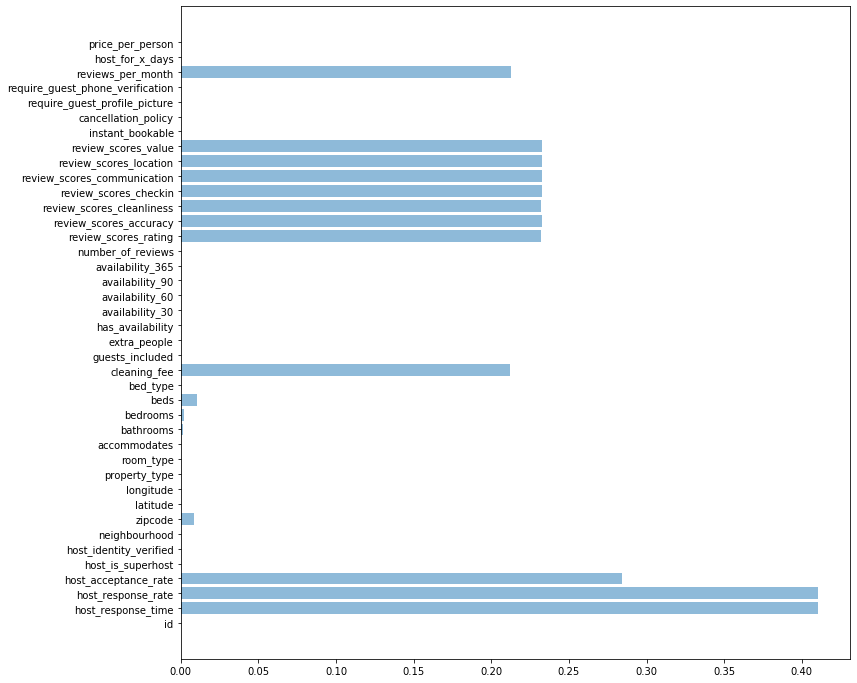

In [18]:
sum_nulls = data.isnull().sum()/data.shape[0]
x_pos = np.arange(len(data.columns))

plt.figure(num=None, figsize=(12, 12))
plt.barh(x_pos, sum_nulls, align='center', alpha=0.5)
plt.yticks(x_pos, data.columns)
plt.show()

So the columns with missing values are 'host_response_time', 'reviews_per_month', all 'reviews', 'cleaning_fee', 'beds', 'zipcode', 'host_acceptance_rate', 'host_response_rate', 'host_location'

In [19]:
data['host_response_time'] = data['host_response_time'].replace(np.nan, 'Unknown')

#note: -1 will mean unknown or no data
data['host_response_rate'] = data['host_response_rate'].replace(np.nan, -1)
data['host_acceptance_rate'] = data['host_acceptance_rate'].replace(np.nan, -1)
data['review_scores_value'] = data['review_scores_value'].replace(np.nan, -1)
data['review_scores_location'] = data['review_scores_location'].replace(np.nan, -1)
data['review_scores_communication'] = data['review_scores_communication'].replace(np.nan, -1)
data['review_scores_checkin'] = data['review_scores_checkin'].replace(np.nan, -1)
data['review_scores_cleanliness'] = data['review_scores_cleanliness'].replace(np.nan, -1)
data['review_scores_accuracy'] = data['review_scores_accuracy'].replace(np.nan, -1)
data['review_scores_rating'] = data['review_scores_rating'].replace(np.nan, -1)
data['host_for_x_days'] = data['host_for_x_days'].replace(np.nan, -1)


#make safe assumptions
data['reviews_per_month'] = data['reviews_per_month'].replace(np.nan, 0.0)
data['cleaning_fee'] = data['cleaning_fee'].replace(np.nan, 0.0)
data['beds'] = data['beds'].replace(np.nan, 1.0)
data['host_is_superhost'] = data['host_is_superhost'].replace(np.nan, 0)
data['host_identity_verified'] = data['host_identity_verified'].replace(np.nan, 0)
data['bedrooms'] = data['bedrooms'].replace(np.nan, 1)
data['bathrooms'] = data['bathrooms'].replace(np.nan, 1)




Note that we don't fill in Neighborhood or Zipcode because that information isn't super useful for clustering. We can leave it is as and reference it to understand the clusters, but it's not needed for the model.

### One hot encoding

Now, we can do one hot encoding on categorical features. We'll handle amenities later.

In [20]:
cat_vars = ['host_response_time', 'property_type', 'room_type', 'bed_type', 'cancellation_policy']
data_encoded = pd.get_dummies(data=data, columns=cat_vars)
data_encoded.head()

,id,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,neighbourhood,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,cleaning_fee,guests_included,extra_people,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,host_for_x_days,price_per_person,host_response_time_Unknown,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,property_type_Aparthotel,property_type_Apartment,property_type_Barn,property_type_Bed and breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Bus,property_type_Cabin,property_type_Camper/RV,property_type_Casa particular (Cuba),property_type_Castle,property_type_Cave,property_type_Condominium,property_type_Cottage,property_type_Dome house,property_type_Dorm,property_type_Earth house,property_type_Farm stay,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_Hotel,property_type_House,property_type_Houseboat,property_type_In-law,property_type_Island,property_type_Lighthouse,property_type_Loft,property_type_Other,property_type_Resort,property_type_Serviced apartment,property_type_Tent,property_type_Timeshare,property_type_Tiny house,property_type_Townhouse,property_type_Train,property_type_Treehouse,property_type_Villa,property_type_Yurt,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60
0,2060,0.22,0.50,0.0,0.0,Washington Heights,10040,40.85722,-73.93790,2,1.0,1.0,2.0,0.0,1,0.0,1,30,60,90,365,1,80.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,0,0.01,4284.0,100.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0
1,2595,0.93,0.36,0.0,1.0,Manhattan,10018,40.75362,-73.98377,2,1.0,0.0,1.0,95.0,1,0.0,1,30,60,90,365,48,94.0,9.0,9.0,10.0,10.0,10.0,9.0,0,1,1,0.38,4262.0,225.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,3831,0.89,0.95,0.0,1.0,Clinton Hill,11238,40.68514,-73.95976,3,1.0,1.0,4.0,0.0,1,0.0,1,30,55,71,233,315,89.0,9.0,9.0,10.0,9.0,9.0,8.0,0,0,0,4.68,4173.0,89.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
3,5099,-1.00,0.75,0.0,0.0,Midtown East,10016,40.74767,-73.97500,2,1.0,1.0,1.0,125.0,2,100.0,1,0,0,0,0,78,90.0,10.0,9.0,10.0,10.0,10.0,9.0,0,1,1,0.58,4116.0,100.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
4,5121,-1.00,0.67,0.0,0.0,Brooklyn,11216,40.68688,-73.95596,2,1.0,1.0,1.0,0.0,1,30.0,1,30,60,90,365,50,90.0,8.0,8.0,10.0,10.0,9.0,9.0,0,0,0,0.38,4115.0,60.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0


### Merge amenities into other data

In [21]:
all_data = pd.concat([data_encoded, amenities],axis=1)
all_data.head(2)

,id,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,neighbourhood,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,cleaning_fee,guests_included,extra_people,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,host_for_x_days,price_per_person,host_response_time_Unknown,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,property_type_Aparthotel,property_type_Apartment,property_type_Barn,property_type_Bed and breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Bus,property_type_Cabin,property_type_Camper/RV,property_type_Casa particular (Cuba),property_type_Castle,property_type_Cave,property_type_Condominium,property_type_Cottage,property_type_Dome house,property_type_Dorm,property_type_Earth house,property_type_Farm stay,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_Hotel,property_type_House,property_type_Houseboat,property_type_In-law,property_type_Island,property_type_Lighthouse,property_type_Loft,property_type_Other,property_type_Resort,property_type_Serviced apartment,property_type_Tent,property_type_Timeshare,property_type_Tiny house,property_type_Townhouse,property_type_Train,property_type_Treehouse,property_type_Villa,property_type_Yurt,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,Internet,Wifi,TV,Air conditioning,Kitchen,Paid parking off premises,Free street parking,Heating,Family/kid friendly,Smoke detector,Carbon monoxide detector,Fire extinguisher,Essentials,Lock on bedroom door,Hair dryer,Iron,Laptop friendly workspace,Self check-in,Keypad,Private living room,Bathtub,Hot water,Bed linens,Extra pillows and blankets,Ethernet connection,Coffee maker,Refrigerator,Dishes and silverware,Cooking basics,Oven,Stove,Luggage dropoff allowed,Long term stays allowed,Cleaning before checkout,Cable TV,Pets allowed,Shampoo,24-hour check-in,Hangers,Lockbox,High chair,Stair gates,Children’s books and toys,Pack ’n Play/travel crib,Microwave,Buzzer/wireless intercom,First aid kit,Host greets you,Pets live on this property,Cat(s),Doorman,Breakfast,Dog(s),Elevator,Dishwasher,Waterfront,Suitable for events,Washer,Dryer,Safety card,Patio or balcony,Garden or backyard,Beach essentials,Private entrance,Other,Building staff,Window guards,No stairs or steps to enter,Shower gel,Trash can,Crib,BBQ grill,Wheelchair accessible,Room-darkening shades,Pocket wifi,Single level home,Babysitter recommendations,Baking sheet,Pool,Washer/Dryer,Paid parking on premises,Hot tub,Children’s dinnerware,Free parking on premises,Other pet(s),Smart lock,Gym,Outlet covers,Baby bath,Changing table,Table corner guards,Firm mattress,Smoking allowed,Indoor fireplace,Game console,Fireplace guards,EV charger,Wide hallways,Wide entrance for guests,Well-lit path to entrance,Ski-in/Ski-out,Private bathroom,Baby monitor,Barbecue utensils,Flat path to guest entrance,Beachfront,Extra space around bed,Accessible-height bed,Accessible-height toilet,Fixed grab bars for shower,Hot water kettle,,Lake access,Handheld shower head,Bread maker,Ground floor access,Air purifier,Wide entrance,Wide doorway to guest bathroom,Wide clearance to shower,toilet,Wide entryway,Full kitchen,Disabled parking spot,Step-free shower,Fixed grab bars f

### Select only Manhattan data for pilot

We will group similar Airbnb listings only in Manhattan for this pilot model. This will also help when gathering Foursquare data since the hourly limit on api calls is 5,000. 

In [22]:
manhattan_data = all_data.loc[all_data['neighbourhood']=='Manhattan']
manhattan_data.shape

(10327, 242)

# Part 2: Get Foursquare Data

Now we will use the Foursquare API to get neighborhood amenities for each listing

In [22]:
import requests

In [23]:
location = manhattan_data[['id', 'latitude', 'longitude']].copy()
location = location.reset_index(drop=True)
location.head(2)

,id,latitude,longitude
0,2595,40.75362,-73.98377
1,5178,40.76489,-73.98493


In [24]:
CLIENT_ID = '1G2AS2ITKKKRPNL5Q2NFNPR3HDONFD1LS21IIB3VVG1I32IW' 
CLIENT_SECRET = 'AAWCRW0WCTVV20WEBVD0J5FNAGFPE4IMVRUGJRRCFNGJ2PDV' 
VERSION = '20180605' 
LIMIT=100

In [25]:
#function to get data
def getNearbyVenues(data, radius=500):
    
    venues_list=[]
    for index, row in data.iterrows():
        if index %1000 == 0:
            print(index)
            
        name = row['id']
        lat = row['latitude']
        lng = row['longitude']
    
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        try:
            # make the GET request
            response = requests.get(url).json()["response"]
            results = response['groups'][0]['items']
        
            # note any area codes that doen't have foursquare listings
            if response['totalResults']==0:
                print('No listings in Foresquare for id ', row['id'])
                continue

            # return only relevant information for each nearby venue
            venues_list.append([(
                name, 
                lat, 
                lng, 
                v['venue']['name'], 
                v['venue']['location']['lat'], 
                v['venue']['location']['lng'],  
                v['venue']['categories'][0]['name']) for v in results])
        
        except Exception as e:
            print('error with id: ', name, ': ', e)
            continue

        
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Listing id', 
                  'Listing Latitude', 
                  'Listing Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

The Foursquare API limits us to 5000 calls per hour so we will make three iterations of calling the above function. First, we will call it for rows 0-4999, then on 5000-9999, and finally on the remaining rows in the Manhattan dataset.

In [26]:
subset1 = location[0:5000]
venues1 = getNearbyVenues(subset1)

0
error with id:  860163.0 :  'groups'
error with id:  978582.0 :  'groups'
error with id:  993514.0 :  'groups'
error with id:  993576.0 :  'groups'
error with id:  1043046.0 :  'groups'
error with id:  1057022.0 :  'groups'
error with id:  1060019.0 :  'groups'
error with id:  1062983.0 :  'groups'
error with id:  1066769.0 :  'groups'
1000
2000
3000
4000


In [27]:
subset2 = location[5000:10000]
venues2 = getNearbyVenues(subset2)

5000
error with id:  20331468.0 :  'groups'
6000
7000
8000
error with id:  39969519.0 :  'groups'
9000
error with id:  40089279.0 :  'groups'
error with id:  40200804.0 :  'groups'
error with id:  40215789.0 :  'groups'
error with id:  40281351.0 :  'groups'
error with id:  40357574.0 :  'groups'
error with id:  41963439.0 :  'groups'
error with id:  41975108.0 :  'groups'
error with id:  41997418.0 :  'groups'
error with id:  41997496.0 :  'groups'
error with id:  42034456.0 :  'groups'


In [28]:
subset3 = location[10000:]
venues3 = getNearbyVenues(subset3)

10000
error with id:  42974078.0 :  'groups'
error with id:  42975049.0 :  'groups'
error with id:  42994947.0 :  'groups'
error with id:  43011035.0 :  'groups'
error with id:  43023624.0 :  'groups'
error with id:  43069847.0 :  'groups'
error with id:  43087096.0 :  'groups'
error with id:  43100915.0 :  'groups'


In [35]:
# merge venue info
all_venues = pd.concat([venues1, venues2, venues3])

In [37]:
all_venues.head()

,Listing id,Listing Latitude,Listing Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,2595.0,40.75362,-73.98377,Bryant Park,40.753621,-73.983265,Park
1,2595.0,40.75362,-73.98377,Books Kinokuniya,40.754053,-73.984649,Bookstore
2,2595.0,40.75362,-73.98377,New York Public Library Terrace,40.753017,-73.981480,Plaza
3,2595.0,40.75362,-73.98377,Blue Bottle Coffee,40.753027,-73.984140,Coffee Shop
4,2595.0,40.75362,-73.98377,Whole Foods Market,40.754507,-73.984299,Grocery Store


Now that we have data about venues near each listing in Manhattan, we need to do a one-hot encoding and then aggregate by listing id

In [38]:
# one hot encoding
venues_onehot = pd.get_dummies(all_venues[['Venue Category']], prefix="", prefix_sep="")
venues_onehot.head()

,ATM,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Basketball Stadium,Bay,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Cambodian Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Castle,Caucasian Restaurant,Chaat Place,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Churrascaria,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,College Gym,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cruise,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Dentist's Office,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Golf Driving Range,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,High School,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Hunan Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Laundry Service,Leather Goods Store,Lebanese Restaurant,Library,Lighthouse,Lingerie Store,Liquor Store,Locksmith,Lounge,Luggage Store,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music School,Music Store,Music Venue,Nail Salon,Nature Preserve,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Other Repair Shop,Outdoor Gym,Outdoor Sculpture,Outdoor Supply Store,Outdoors & Recreation,Paella Restaurant,Pakistani Restaura

In [41]:
# add listing column back to dataframe
venues_onehot['Listing id'] = all_venues['Listing id']

#get frequencies
venues_grouped = venues_onehot.groupby('Listing id').mean().reset_index()
venues_grouped.head()

,Listing id,ATM,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Basketball Stadium,Bay,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Cambodian Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Castle,Caucasian Restaurant,Chaat Place,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Churrascaria,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,College Gym,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cruise,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Dentist's Office,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Golf Driving Range,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,High School,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Hunan Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Laundry Service,Leather Goods Store,Lebanese Restaurant,Library,Lighthouse,Lingerie Store,Liquor Store,Locksmith,Lounge,Luggage Store,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music School,Music Store,Music Venue,Nail Salon,Nature Preserve,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Other Repair Shop,Outdoor Gym,Outdoor Sculpture,Outdoor Supply Store,Outdoors & Recreation,Paella Restaurant,Pakista

In [42]:
venues_grouped.shape

(10298, 419)

Lets save the data from this section so we don't need to rerun all the code in the future.

In [88]:
venues_grouped.to_csv('foursquare.csv', index=False)

# Part 3: Finalize dataset for clustering

Now we have encoded data about venues for the listings and the listings themselves. We can merge our existing dataframes into a final dataframe to use for clustering

In [23]:
# Use the following when running after the first time to avoid making API calls
venues_grouped = pd.read_csv('foursquare.csv')

In [24]:
#recall what manhattan airbnb data looks like
print(manhattan_data.shape)
manhattan_data.head()

(10327, 242)


,id,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,neighbourhood,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,cleaning_fee,guests_included,extra_people,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,host_for_x_days,price_per_person,host_response_time_Unknown,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,property_type_Aparthotel,property_type_Apartment,property_type_Barn,property_type_Bed and breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Bus,property_type_Cabin,property_type_Camper/RV,property_type_Casa particular (Cuba),property_type_Castle,property_type_Cave,property_type_Condominium,property_type_Cottage,property_type_Dome house,property_type_Dorm,property_type_Earth house,property_type_Farm stay,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_Hotel,property_type_House,property_type_Houseboat,property_type_In-law,property_type_Island,property_type_Lighthouse,property_type_Loft,property_type_Other,property_type_Resort,property_type_Serviced apartment,property_type_Tent,property_type_Timeshare,property_type_Tiny house,property_type_Townhouse,property_type_Train,property_type_Treehouse,property_type_Villa,property_type_Yurt,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,Internet,Wifi,TV,Air conditioning,Kitchen,Paid parking off premises,Free street parking,Heating,Family/kid friendly,Smoke detector,Carbon monoxide detector,Fire extinguisher,Essentials,Lock on bedroom door,Hair dryer,Iron,Laptop friendly workspace,Self check-in,Keypad,Private living room,Bathtub,Hot water,Bed linens,Extra pillows and blankets,Ethernet connection,Coffee maker,Refrigerator,Dishes and silverware,Cooking basics,Oven,Stove,Luggage dropoff allowed,Long term stays allowed,Cleaning before checkout,Cable TV,Pets allowed,Shampoo,24-hour check-in,Hangers,Lockbox,High chair,Stair gates,Children’s books and toys,Pack ’n Play/travel crib,Microwave,Buzzer/wireless intercom,First aid kit,Host greets you,Pets live on this property,Cat(s),Doorman,Breakfast,Dog(s),Elevator,Dishwasher,Waterfront,Suitable for events,Washer,Dryer,Safety card,Patio or balcony,Garden or backyard,Beach essentials,Private entrance,Other,Building staff,Window guards,No stairs or steps to enter,Shower gel,Trash can,Crib,BBQ grill,Wheelchair accessible,Room-darkening shades,Pocket wifi,Single level home,Babysitter recommendations,Baking sheet,Pool,Washer/Dryer,Paid parking on premises,Hot tub,Children’s dinnerware,Free parking on premises,Other pet(s),Smart lock,Gym,Outlet covers,Baby bath,Changing table,Table corner guards,Firm mattress,Smoking allowed,Indoor fireplace,Game console,Fireplace guards,EV charger,Wide hallways,Wide entrance for guests,Well-lit path to entrance,Ski-in/Ski-out,Private bathroom,Baby monitor,Barbecue utensils,Flat path to guest entrance,Beachfront,Extra space around bed,Accessible-height bed,Accessible-height toilet,Fixed grab bars for shower,Hot water kettle,,Lake access,Handheld shower head,Bread maker,Ground floor access,Air purifier,Wide entrance,Wide doorway to guest bathroom,Wide clearance to shower,toilet,Wide entryway,Full kitchen,Disabled parking spot,Step-free shower,Fixed grab bars f

In [25]:
final_data = manhattan_data.merge(venues_grouped, left_on='id', right_on='Listing id')
print(final_data.shape)
final_data.head()

(10298, 661)


,id,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,neighbourhood,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,cleaning_fee,guests_included,extra_people,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,host_for_x_days,price_per_person,host_response_time_Unknown,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,property_type_Aparthotel,property_type_Apartment,property_type_Barn,property_type_Bed and breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Bus,property_type_Cabin,property_type_Camper/RV,property_type_Casa particular (Cuba),property_type_Castle,property_type_Cave,property_type_Condominium,property_type_Cottage,property_type_Dome house,property_type_Dorm,property_type_Earth house,property_type_Farm stay,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_Hotel,property_type_House,property_type_Houseboat,property_type_In-law,property_type_Island,property_type_Lighthouse,property_type_Loft,property_type_Other,property_type_Resort,property_type_Serviced apartment,property_type_Tent,property_type_Timeshare,property_type_Tiny house,property_type_Townhouse,property_type_Train,property_type_Treehouse,property_type_Villa,property_type_Yurt,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,Internet,Wifi,TV,Air conditioning,Kitchen,Paid parking off premises,Free street parking,Heating,Family/kid friendly,Smoke detector,Carbon monoxide detector,Fire extinguisher,Essentials,Lock on bedroom door,Hair dryer,Iron,Laptop friendly workspace,Self check-in,Keypad,Private living room,Bathtub,Hot water,Bed linens,Extra pillows and blankets,Ethernet connection,Coffee maker,Refrigerator,Dishes and silverware,Cooking basics,Oven,Stove,Luggage dropoff allowed,Long term stays allowed,Cleaning before checkout,Cable TV,Pets allowed,Shampoo,24-hour check-in,Hangers,Lockbox,High chair,Stair gates,Children’s books and toys,Pack ’n Play/travel crib,Microwave,Buzzer/wireless intercom,First aid kit,Host greets you,Pets live on this property,Cat(s),Doorman,Breakfast,Dog(s),Elevator,Dishwasher,Waterfront_x,Suitable for events,Washer,Dryer,Safety card,Patio or balcony,Garden or backyard,Beach essentials,Private entrance,Other,Building staff,Window guards,No stairs or steps to enter,Shower gel,Trash can,Crib,BBQ grill,Wheelchair accessible,Room-darkening shades,Pocket wifi,Single level home,Babysitter recommendations,Baking sheet,Pool_x,Washer/Dryer,Paid parking on premises,Hot tub,Children’s dinnerware,Free parking on premises,Other pet(s),Smart lock,Gym_x,Outlet covers,Baby bath,Changing table,Table corner guards,Firm mattress,Smoking allowed,Indoor fireplace,Game console,Fireplace guards,EV charger,Wide hallways,Wide entrance for guests,Well-lit path to entrance,Ski-in/Ski-out,Private bathroom,Baby monitor,Barbecue utensils,Flat path to guest entrance,Beachfront,Extra space around bed,Accessible-height bed,Accessible-height toilet,Fixed grab bars for shower,Hot water kettle,,Lake access,Handheld shower head,Bread maker,Ground floor access,Air purifier,Wide entrance,Wide doorway to guest bathroom,Wide clearance to shower,toilet,Wide entryway,Full kitchen,Disabled parking spot,Step-free shower,Fixed grab 

In [26]:
#drop location data because we don't need it anymore
clustering_data = final_data.drop(['id', 'neighbourhood', 'zipcode', 'latitude', 'longitude', 'Listing id'], axis=1)

We need to scale the data to ensure accuracy

In [27]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
clustering_data = scale.fit_transform(clustering_data)

# Part 4: Cluster Using K-Means

In [28]:
from sklearn.cluster import KMeans

In [29]:
kclusters = 500
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(clustering_data)

In [30]:
# add clustering labels
final_data.insert(0, 'Cluster Labels', kmeans.labels_)
final_data.head()

,Cluster Labels,id,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,neighbourhood,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,cleaning_fee,guests_included,extra_people,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,host_for_x_days,price_per_person,host_response_time_Unknown,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,property_type_Aparthotel,property_type_Apartment,property_type_Barn,property_type_Bed and breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Bus,property_type_Cabin,property_type_Camper/RV,property_type_Casa particular (Cuba),property_type_Castle,property_type_Cave,property_type_Condominium,property_type_Cottage,property_type_Dome house,property_type_Dorm,property_type_Earth house,property_type_Farm stay,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_Hotel,property_type_House,property_type_Houseboat,property_type_In-law,property_type_Island,property_type_Lighthouse,property_type_Loft,property_type_Other,property_type_Resort,property_type_Serviced apartment,property_type_Tent,property_type_Timeshare,property_type_Tiny house,property_type_Townhouse,property_type_Train,property_type_Treehouse,property_type_Villa,property_type_Yurt,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,Internet,Wifi,TV,Air conditioning,Kitchen,Paid parking off premises,Free street parking,Heating,Family/kid friendly,Smoke detector,Carbon monoxide detector,Fire extinguisher,Essentials,Lock on bedroom door,Hair dryer,Iron,Laptop friendly workspace,Self check-in,Keypad,Private living room,Bathtub,Hot water,Bed linens,Extra pillows and blankets,Ethernet connection,Coffee maker,Refrigerator,Dishes and silverware,Cooking basics,Oven,Stove,Luggage dropoff allowed,Long term stays allowed,Cleaning before checkout,Cable TV,Pets allowed,Shampoo,24-hour check-in,Hangers,Lockbox,High chair,Stair gates,Children’s books and toys,Pack ’n Play/travel crib,Microwave,Buzzer/wireless intercom,First aid kit,Host greets you,Pets live on this property,Cat(s),Doorman,Breakfast,Dog(s),Elevator,Dishwasher,Waterfront_x,Suitable for events,Washer,Dryer,Safety card,Patio or balcony,Garden or backyard,Beach essentials,Private entrance,Other,Building staff,Window guards,No stairs or steps to enter,Shower gel,Trash can,Crib,BBQ grill,Wheelchair accessible,Room-darkening shades,Pocket wifi,Single level home,Babysitter recommendations,Baking sheet,Pool_x,Washer/Dryer,Paid parking on premises,Hot tub,Children’s dinnerware,Free parking on premises,Other pet(s),Smart lock,Gym_x,Outlet covers,Baby bath,Changing table,Table corner guards,Firm mattress,Smoking allowed,Indoor fireplace,Game console,Fireplace guards,EV charger,Wide hallways,Wide entrance for guests,Well-lit path to entrance,Ski-in/Ski-out,Private bathroom,Baby monitor,Barbecue utensils,Flat path to guest entrance,Beachfront,Extra space around bed,Accessible-height bed,Accessible-height toilet,Fixed grab bars for shower,Hot water kettle,,Lake access,Handheld shower head,Bread maker,Ground floor access,Air purifier,Wide entrance,Wide doorway to guest bathroom,Wide clearance to shower,toilet,Wide entryway,Full kitchen,Disabled parking spot,Step-free sho

# Part 5: Visualize Similar Listings

Since we have ~10,000 listings and 500 groups (about 20 listings per group), visualizing all groups is unreasonable. Let's pick one listing and view its similar listings.

In [31]:
import random
import folium

In [53]:
#pick random listing
index = random.randint(0, 10000)
listing = final_data.iloc[[index]]
cluster = listing['Cluster Labels']
listing

,Cluster Labels,id,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,neighbourhood,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,cleaning_fee,guests_included,extra_people,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,host_for_x_days,price_per_person,host_response_time_Unknown,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,property_type_Aparthotel,property_type_Apartment,property_type_Barn,property_type_Bed and breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Bus,property_type_Cabin,property_type_Camper/RV,property_type_Casa particular (Cuba),property_type_Castle,property_type_Cave,property_type_Condominium,property_type_Cottage,property_type_Dome house,property_type_Dorm,property_type_Earth house,property_type_Farm stay,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_Hotel,property_type_House,property_type_Houseboat,property_type_In-law,property_type_Island,property_type_Lighthouse,property_type_Loft,property_type_Other,property_type_Resort,property_type_Serviced apartment,property_type_Tent,property_type_Timeshare,property_type_Tiny house,property_type_Townhouse,property_type_Train,property_type_Treehouse,property_type_Villa,property_type_Yurt,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,Internet,Wifi,TV,Air conditioning,Kitchen,Paid parking off premises,Free street parking,Heating,Family/kid friendly,Smoke detector,Carbon monoxide detector,Fire extinguisher,Essentials,Lock on bedroom door,Hair dryer,Iron,Laptop friendly workspace,Self check-in,Keypad,Private living room,Bathtub,Hot water,Bed linens,Extra pillows and blankets,Ethernet connection,Coffee maker,Refrigerator,Dishes and silverware,Cooking basics,Oven,Stove,Luggage dropoff allowed,Long term stays allowed,Cleaning before checkout,Cable TV,Pets allowed,Shampoo,24-hour check-in,Hangers,Lockbox,High chair,Stair gates,Children’s books and toys,Pack ’n Play/travel crib,Microwave,Buzzer/wireless intercom,First aid kit,Host greets you,Pets live on this property,Cat(s),Doorman,Breakfast,Dog(s),Elevator,Dishwasher,Waterfront_x,Suitable for events,Washer,Dryer,Safety card,Patio or balcony,Garden or backyard,Beach essentials,Private entrance,Other,Building staff,Window guards,No stairs or steps to enter,Shower gel,Trash can,Crib,BBQ grill,Wheelchair accessible,Room-darkening shades,Pocket wifi,Single level home,Babysitter recommendations,Baking sheet,Pool_x,Washer/Dryer,Paid parking on premises,Hot tub,Children’s dinnerware,Free parking on premises,Other pet(s),Smart lock,Gym_x,Outlet covers,Baby bath,Changing table,Table corner guards,Firm mattress,Smoking allowed,Indoor fireplace,Game console,Fireplace guards,EV charger,Wide hallways,Wide entrance for guests,Well-lit path to entrance,Ski-in/Ski-out,Private bathroom,Baby monitor,Barbecue utensils,Flat path to guest entrance,Beachfront,Extra space around bed,Accessible-height bed,Accessible-height toilet,Fixed grab bars for shower,Hot water kettle,,Lake access,Handheld shower head,Bread maker,Ground floor access,Air purifier,Wide entrance,Wide doorway to guest bathroom,Wide clearance to shower,toilet,Wide entryway,Full kitchen,Disabled parking spot,Step-free sho

In [54]:
#find similar listings (includes original listing)
similar = final_data.loc[final_data['Cluster Labels'] == int(cluster)]
similar

,Cluster Labels,id,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,neighbourhood,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,cleaning_fee,guests_included,extra_people,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,host_for_x_days,price_per_person,host_response_time_Unknown,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,property_type_Aparthotel,property_type_Apartment,property_type_Barn,property_type_Bed and breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Bus,property_type_Cabin,property_type_Camper/RV,property_type_Casa particular (Cuba),property_type_Castle,property_type_Cave,property_type_Condominium,property_type_Cottage,property_type_Dome house,property_type_Dorm,property_type_Earth house,property_type_Farm stay,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_Hotel,property_type_House,property_type_Houseboat,property_type_In-law,property_type_Island,property_type_Lighthouse,property_type_Loft,property_type_Other,property_type_Resort,property_type_Serviced apartment,property_type_Tent,property_type_Timeshare,property_type_Tiny house,property_type_Townhouse,property_type_Train,property_type_Treehouse,property_type_Villa,property_type_Yurt,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,Internet,Wifi,TV,Air conditioning,Kitchen,Paid parking off premises,Free street parking,Heating,Family/kid friendly,Smoke detector,Carbon monoxide detector,Fire extinguisher,Essentials,Lock on bedroom door,Hair dryer,Iron,Laptop friendly workspace,Self check-in,Keypad,Private living room,Bathtub,Hot water,Bed linens,Extra pillows and blankets,Ethernet connection,Coffee maker,Refrigerator,Dishes and silverware,Cooking basics,Oven,Stove,Luggage dropoff allowed,Long term stays allowed,Cleaning before checkout,Cable TV,Pets allowed,Shampoo,24-hour check-in,Hangers,Lockbox,High chair,Stair gates,Children’s books and toys,Pack ’n Play/travel crib,Microwave,Buzzer/wireless intercom,First aid kit,Host greets you,Pets live on this property,Cat(s),Doorman,Breakfast,Dog(s),Elevator,Dishwasher,Waterfront_x,Suitable for events,Washer,Dryer,Safety card,Patio or balcony,Garden or backyard,Beach essentials,Private entrance,Other,Building staff,Window guards,No stairs or steps to enter,Shower gel,Trash can,Crib,BBQ grill,Wheelchair accessible,Room-darkening shades,Pocket wifi,Single level home,Babysitter recommendations,Baking sheet,Pool_x,Washer/Dryer,Paid parking on premises,Hot tub,Children’s dinnerware,Free parking on premises,Other pet(s),Smart lock,Gym_x,Outlet covers,Baby bath,Changing table,Table corner guards,Firm mattress,Smoking allowed,Indoor fireplace,Game console,Fireplace guards,EV charger,Wide hallways,Wide entrance for guests,Well-lit path to entrance,Ski-in/Ski-out,Private bathroom,Baby monitor,Barbecue utensils,Flat path to guest entrance,Beachfront,Extra space around bed,Accessible-height bed,Accessible-height toilet,Fixed grab bars for shower,Hot water kettle,,Lake access,Handheld shower head,Bread maker,Ground floor access,Air purifier,Wide entrance,Wide doorway to guest bathroom,Wide clearance to shower,toilet,Wide entryway,Full kitchen,Disabled parking spot,Step-free sho

In [55]:
# create map
map_clusters = folium.Map(location=[listing['latitude'], listing['longitude']], zoom_start=16)

# add markers to the map
for lat, lon, idnum in zip(similar['latitude'], similar['longitude'], similar['id']):
    label = folium.Popup(str(idnum), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=7,
        popup=label,
        color='green',
        fill=True,
        fill_color='green',
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# Part 6: Some Analysis

Unfortunately, there are 40 listings that don't have any similar listings. That is, their clusters contain one entry.

In [62]:
counts = final_data.groupby('Cluster Labels').count()

In [64]:
counts.loc[counts['id']==1].shape[0]

40

In [69]:
indeces = counts.loc[counts['id']==1].index

In [77]:
alone = final_data.iloc[indeces]

# create map
map_clusters = folium.Map(location=[40.7831, -73.9712], zoom_start=12)

# add markers to the map
for lat, lon, idnum in zip(alone['latitude'], alone['longitude'], alone['id']):
    label = folium.Popup(str(idnum), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=7,
        popup=label,
        color='green',
        fill=True,
        fill_color='green',
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters